In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us_stock_historical_data.csv')
df

,Date,Close/Last,Volume,Open,High,Low
0,08/05/2022,141.2188,292441.0,143.4688,143.8438,140.5938
1,08/04/2022,136.6562,NaN,136.6562,136.6562,136.6562
2,08/03/2022,136.6562,NaN,136.6562,136.6562,136.6562
3,08/02/2022,136.6562,NaN,136.6562,136.6562,136.6562
4,08/01/2022,136.6562,NaN,136.6562,136.6562,136.6562
...,...,...,...,...,...,...
1253,08/14/2017,155.1562,181940.0,155.4062,155.5000,154.8438
1254,08/11/2017,155.4688,268398.0,155.5312,155.9062,154.7188
1255,08/10/2017,155.3438,275464.0,154.6250,155.5938,154.4062
1256,08/09/2017,154.7188,246105.0,154.1875,155.2500,154.1562


In [2]:
df.drop('Volume', axis = 1, inplace = True)    # irrelevant column

In [3]:
df.rename(columns = {'Close/Last' : 'Close'}, inplace = True)

In [4]:
df.set_index('Date', inplace = True)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.insert(4, column = 'Daily Max High', value = df['High'])
df.insert(5, column = 'Daily Min Low', value = df['Low'])

In [7]:
df    # check, how it looks like now

,Close,Open,High,Low,Daily Max High,Daily Min Low
Date,,,,,,
2022-08-05,141.2188,143.4688,143.8438,140.5938,143.8438,140.5938
2022-08-04,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-08-03,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-08-02,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-08-01,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
...,...,...,...,...,...,...
2017-08-14,155.1562,155.4062,155.5000,154.8438,155.5000,154.8438
2017-08-11,155.4688,155.5312,155.9062,154.7188,155.9062,154.7188
2017-08-10,155.3438,154.6250,155.5938,154.4062,155.5938,154.4062


In [8]:
def check_week(index, mode):
    # collect all prices from the week
    week_prices = []
    
    for item in df.index:
        if item.year == index.year and item.week == index.week:
            if mode == 'max':
                week_prices.append(df.loc[item]['High'])
            elif mode == 'min':
                week_prices.append(df.loc[item]['Low'])

    if mode == 'max':
        return max(week_prices)
    elif mode == 'min':
        return min(week_prices)

In [9]:
weekly_max = []
for item in df.index:
    for index in df.index:
        if index.year == item.year and index.month == item.month and index.day == item.day:

            if item.day_of_week == 4:
                weekly_max.append(check_week(index, mode = 'max'))
            else:
                weekly_max.append(None)    # not friday, will be backfilled

weekly_min = []
for item in df.index:
    for index in df.index:
        if index.year == item.year and index.month == item.month and index.day == item.day:

            if item.day_of_week == 4:
                weekly_min.append(check_week(index, mode = 'min'))
            else:
                weekly_min.append(None)    # not friday, will be backfilled

In [10]:
df.insert(loc = 6, column = 'Weekly Max High', value = weekly_max)

In [11]:
df.insert(loc = 7, column = 'Weekly Min Low', value = weekly_min)

In [12]:
df.fillna(method = 'bfill', inplace = True)    # backfill the NaN values, because it will be the same as the previous week, if its not friday

In [13]:
df[40:80]    # form check

,Close,Open,High,Low,Daily Max High,Daily Min Low,Weekly Max High,Weekly Min Low
Date,,,,,,,,
2022-06-08,138.0000,138.7812,138.7812,137.8125,138.7812,137.8125,142.0312,138.5000
2022-06-07,139.0000,137.6875,139.1250,137.5000,139.1250,137.5000,142.0312,138.5000
2022-06-06,137.7188,139.3750,139.4375,137.5312,139.4375,137.5312,142.0312,138.5000
2022-06-03,139.1875,139.6250,139.8750,138.5000,139.8750,138.5000,142.0312,138.5000
2022-06-02,139.7500,139.9062,140.3438,139.1875,140.3438,139.1875,142.6875,140.0312
2022-06-01,139.6250,140.4062,141.0000,139.2500,141.0000,139.2500,142.6875,140.0312
2022-05-31,140.4375,141.9062,142.0312,139.6875,142.0312,139.6875,142.6875,140.0312
2022-05-27,141.9375,141.7500,142.6875,141.5312,142.6875,141.5312,142.6875,140.0312
2022-05-26,141.6875,141.8125,142.5625,140.9688,142.5625,140.9688,142.0625,137.9375


In [14]:
def check_month(item, mode):
    # collect all prices from the month
    month_prices = []

    for index in df.index:
        if index.year == item.year and index.month == item.month:
            if mode == 'max':
                month_prices.append(df.loc[index]['High'])
            elif mode == 'min':
                month_prices.append(df.loc[index]['Low'])
                
    if mode == 'max':
        return max(month_prices)
    elif mode == 'min':
        return min(month_prices)

In [15]:
#finding month leaps that are in the database (last days of the months --> i + 1)
month_prices_max = []
for i in range (0, len(df.index) - 1):
    if df.index[i].month != df.index[i + 1].month:    # there is a month leap
        month_prices_max.append(check_month(df.index[i + 1], mode = 'max'))
    else:
        month_prices_max.append(None)    # there is not, will be backfilled


month_prices_min = []
for i in range (0, len(df.index) - 1):
    if df.index[i].month != df.index[i + 1].month:
        month_prices_min.append(check_month(df.index[i + 1], mode = 'min'))
    else:
        month_prices_min.append(None)

In [16]:
# because the range run for len(df.index) - 1, and the last data is not any leap, so it is not important
month_prices_max.append(None)
month_prices_min.append(None)

In [17]:
# duplicate the first weekdays of the month for the previous month's last day
idx_of_not_none = []
for i in range (len(month_prices_max)):
    if month_prices_max[i] != None:
        idx_of_not_none.append(i)

In [18]:
for i in range (len(idx_of_not_none)):
    idx_of_not_none[i] += 1

for x in idx_of_not_none:
    month_prices_max[x] = month_prices_max[x - 1]
    month_prices_min[x] = month_prices_min[x - 1]

In [19]:
df.insert(loc = 8, column = 'Monthly Max High', value = month_prices_max)
df.insert(loc = 9, column = 'Montlhy Min Low', value = month_prices_min)

In [20]:
df.fillna(method = 'bfill', inplace = True)    # backfill the same way as the weekly values

In [21]:
df[:40]    # form check

,Close,Open,High,Low,Daily Max High,Daily Min Low,Weekly Max High,Weekly Min Low,Monthly Max High,Montlhy Min Low
Date,,,,,,,,,,
2022-08-05,141.2188,143.4688,143.8438,140.5938,143.8438,140.5938,143.8438,136.6562,136.6562,136.6562
2022-08-04,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-08-03,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-08-02,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-08-01,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-07-29,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562
2022-07-28,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,141.0000,132.2812
2022-07-27,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,141.0000,132.2812
2022-07-26,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,136.6562,141.0000,132.2812


In [22]:
def check_quarter(item, mode):
    # collect all prices from the quarter
    quarter_prices = []

    for index in df.index:
        if index.year == item.year and index.quarter == item.quarter:
            if mode == 'max':
                quarter_prices.append(df.loc[index]['High'])
            elif mode == 'min':
                quarter_prices.append(df.loc[index]['Low'])

    if mode == 'max':
        return max(quarter_prices)
    elif mode == 'min':
        return min(quarter_prices)

In [23]:
quarter_prices_max = []
for i in range (0, len(df.index) - 1):
    if df.index[i].quarter != df.index[i + 1].quarter:    # there is a quarter leap
        quarter_prices_max.append(check_quarter(df.index[i + 1], mode = 'max'))
    else:
        quarter_prices_max.append(None)    # there is not, will be backfilled

quarter_prices_min = []
for i in range (0, len(df.index) - 1):
    if df.index[i].quarter != df.index[i + 1].quarter:
        quarter_prices_min.append(check_quarter(df.index[i + 1], mode = 'min'))
    else:
        quarter_prices_min.append(None)

In [24]:
# because the range run for len(df.index) - 1, and the last data is not any leap, so it is not important
quarter_prices_max.append(None)
quarter_prices_min.append(None)

In [25]:
# duplicate the first weekdays of the month for the previous month's last day
idx_of_not_none = []
for i in range (len(quarter_prices_max)):
    if quarter_prices_max[i] != None:
        idx_of_not_none.append(i)

In [26]:
for i in range (len(idx_of_not_none)):
    idx_of_not_none[i] += 1

for x in idx_of_not_none:
    quarter_prices_max[x] = quarter_prices_max[x - 1]
    quarter_prices_min[x] = quarter_prices_min[x - 1]

In [27]:
df.insert(loc = 10, column = 'Quarter Max', value = quarter_prices_max)
df.insert(loc = 11, column = 'Quarter Min', value = quarter_prices_min)

In [28]:
df.fillna(method = 'bfill', inplace = True)    # backfill the NaN values in the same way as the weekly and monthly values

In [29]:
df[200:240]    # form check

,Close,Open,High,Low,Daily Max High,Daily Min Low,Weekly Max High,Weekly Min Low,Monthly Max High,Montlhy Min Low,Quarter Max,Quarter Min
Date,,,,,,,,,,,,
2021-10-19,158.2812,159.1875,159.7812,158.0625,159.7812,158.0625,160.3438,157.0938,164.750,158.6875,167.1250,158.6875
2021-10-18,159.5625,159.4062,159.7188,158.6562,159.7188,158.6562,160.3438,157.0938,164.750,158.6875,167.1250,158.6875
2021-10-15,159.3750,160.2188,160.2500,159.0938,160.2500,159.0938,160.3438,157.0938,164.750,158.6875,167.1250,158.6875
2021-10-14,160.0938,159.8438,160.3438,159.1875,160.3438,159.1875,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-13,159.6562,158.6562,159.9375,158.4375,159.9375,158.4375,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-12,158.5625,157.5000,158.9375,157.4062,158.9375,157.4062,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-11,157.4688,157.5938,157.7188,157.0938,157.7188,157.0938,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-08,157.7500,158.3750,158.6562,157.5000,158.6562,157.5000,160.6250,157.5000,164.750,158.6875,167.1250,158.6875
2021-10-07,158.4375,159.4375,159.7500,158.3125,159.7500,158.3125,161.2500,158.6875,164.750,158.6875,167.1250,158.6875


In [30]:
df.to_csv('us_stock_price_statistics_data.csv')
df.to_excel('us_stock_price_statistics_data.xlsx', sheet_name = 'Stock Price Statistics Data')

In [31]:
def query_for_a_day(on = False):
    # get datas for a day
    if on:
        print("Press enter to exit from the query!\nAvailable date range: [2017.08.08 ; 2022.08.05]\n")
        while True:
            year = input("Year: ")
            if year == "":
                break
            month = input("Month: ")
            if month == "":
                break
            day = input("Day: ")
            if day == "":
                break
            
            try:
                year, month, day = int(year), int(month), int(day)
            except ValueError:
                print("Invalid input!\n")
                continue
            
            query_idx = f"{year}-{month}-{day}"
            
            try:
                print(df.loc[query_idx])
            except KeyError:
                print("No data found on this day.")

            print()

In [32]:
query_for_a_day(on = True)

Press enter to exit from the query!
Available date range: [2017.08.08 ; 2022.08.05]

Year: 2022
Month: 05
Day: 27
Close               141.9375
Open                141.7500
High                142.6875
Low                 141.5312
Daily Max High      142.6875
Daily Min Low       141.5312
Weekly Max High     142.6875
Weekly Min Low      140.0312
Monthly Max High    150.0625
Montlhy Min Low     138.4375
Quarter Max         160.3750
Quarter Min         146.3125
Name: 2022-05-27 00:00:00, dtype: float64

Year: 2019
Month: 05
Day: 27
No data found on this day.

Year: 2022
Month: 05.
Day: 27
Invalid input!

Year: 


In [33]:
# plotting
x1 = df.index
y1 = df['Weekly Max High']
y2 = df['Quarter Max']

x2 = df.index[df.index.year == 2021]
y3 = df['Daily Max High'][df.index.year == 2021]
y4 = df['Daily Min Low'][df.index.year == 2021]

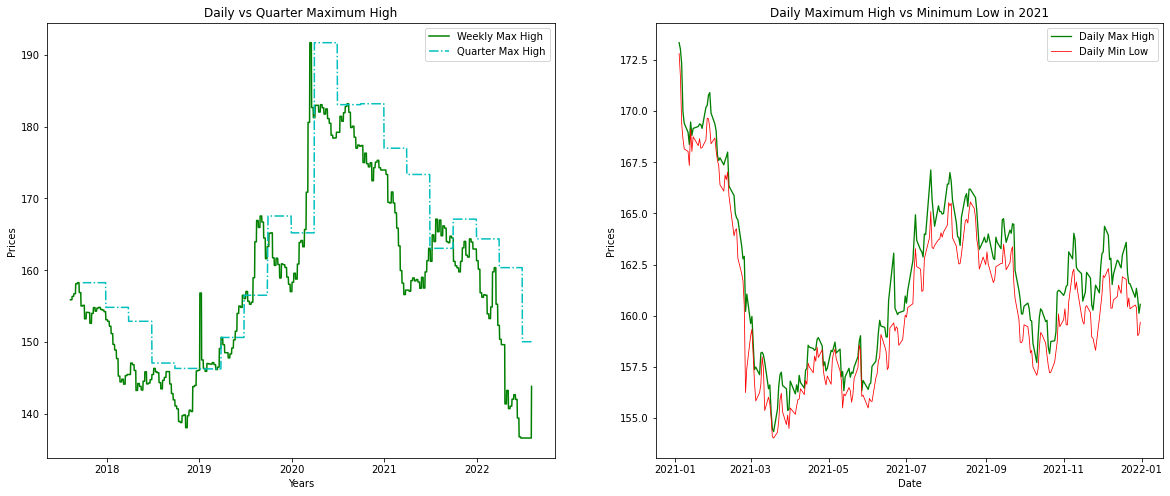

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].plot(x1, y1, color = 'g', label = 'Weekly Max High')
ax[0].plot(x1, y2, color = 'c', label = 'Quarter Max High', linestyle = '-.')

ax[0].set_xlabel('Years')
ax[0].set_ylabel('Prices')
ax[0].set_title('Weekly vs Quarter Maximum High')
ax[0].legend()


ax[1].plot(x2, y3, color = 'g', label = 'Daily Max High', linewidth = 1.3)
ax[1].plot(x2, y4, color = 'r', label = 'Daily Min Low', linewidth = 0.8)

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Prices')
ax[1].set_title('Daily Maximum High vs Minimum Low in 2021')
ax[1].legend()

plt.show()